In [96]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm





We first define all function we are going to need. All of these are in 2d. We calculate the energy, the relative energy error and the positions nad velocities using Eulers method.

In [97]:
#Function to calculate the energy when given position and velocity
def energy(w, s): 
    return norm(w)**2/2 - (1/norm(s))

#Function to calculate the relative error of the energies, given the enrgy at t=0
def energy_error(Energies, E_0): 
    rel_E = []
    for Energy in Energies:
        rel_E_i = np.abs((E_0 - Energy)/E_0)
        rel_E.append(np.abs(rel_E_i))
    return rel_E


#Helper function to turn an array of 2d vectords into 2 separate 1d arrays 
def turn_vectors_into_2_arrays(List):
    x_list = []
    y_list = []
    for i in List:
        x_list.append(i[0])
        y_list.append(i[1])
    return x_list, y_list

#Eulers method to calculate the position and velocity
def calculate(s_0, w_0, h, steps):
    S = []
    W = []
    E = []
    for i in range(steps):
        s_i = s_0 + (w_0*h)
        w_i = w_0 - ((s_0/norm(s_0)**3) * h)
        W.append(w_i)
        S.append(s_i)
        e = energy(w_i, s_i)
        E.append(e)
        s_0 = s_i
        w_0 = w_i
    x_s, y_s = turn_vectors_into_2_arrays(S)
    return x_s, y_s, E, W

We try the calculate function with a vector $\vec{s} = (1,0)^T$, the velocity is perpendicular to the position vector, thus the calculation should follow a circle. $\vec{w} = (0,1)^T$. We set the timesteps to $\Delta t = 0.05$ and the iteration steps to 200 and plot the relative Error after each step.

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


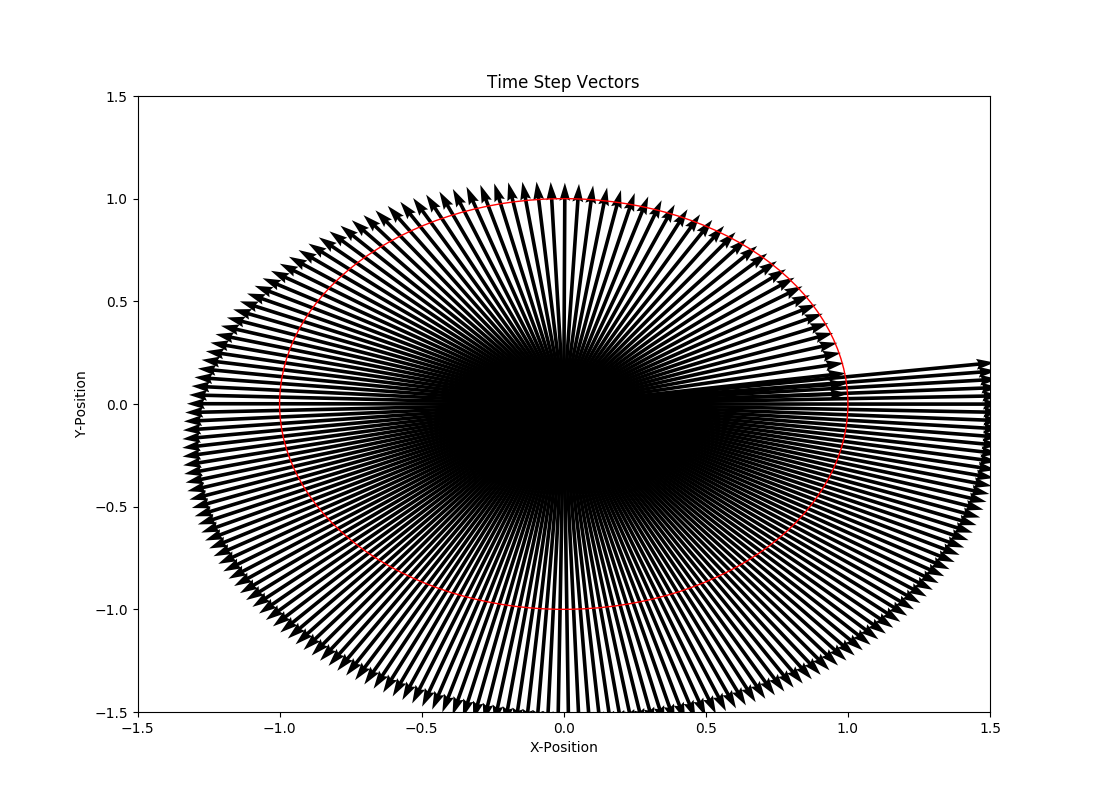

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


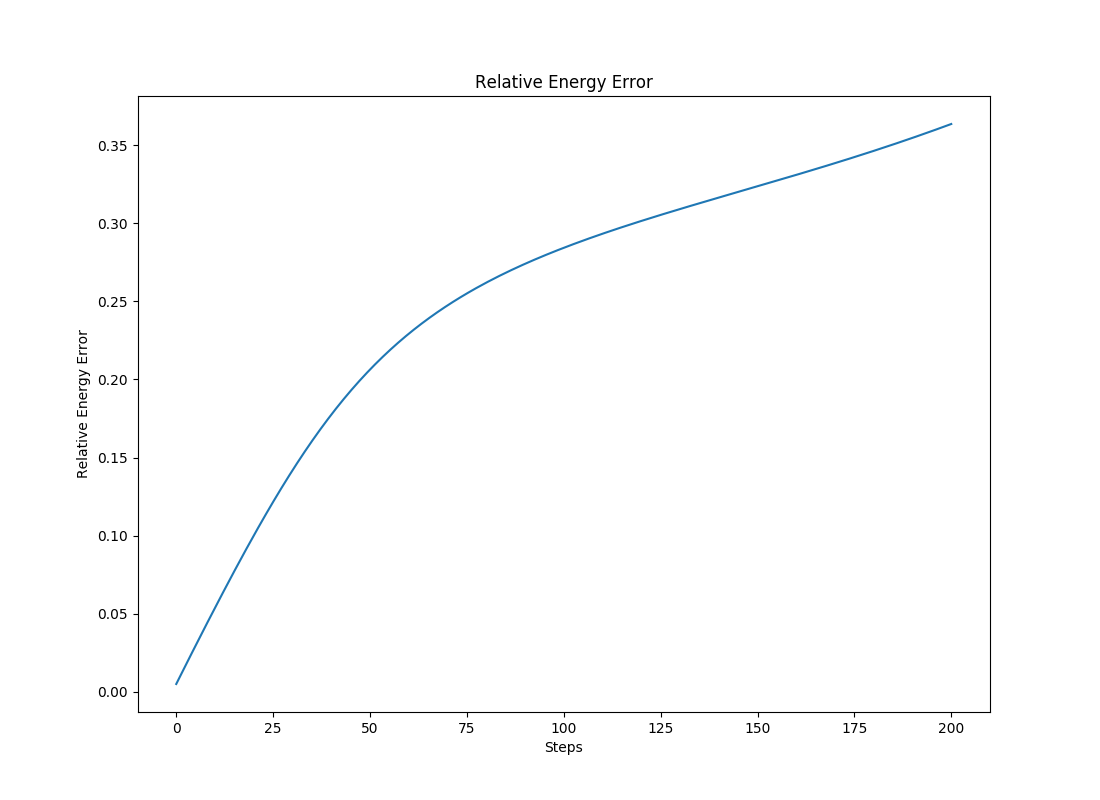

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


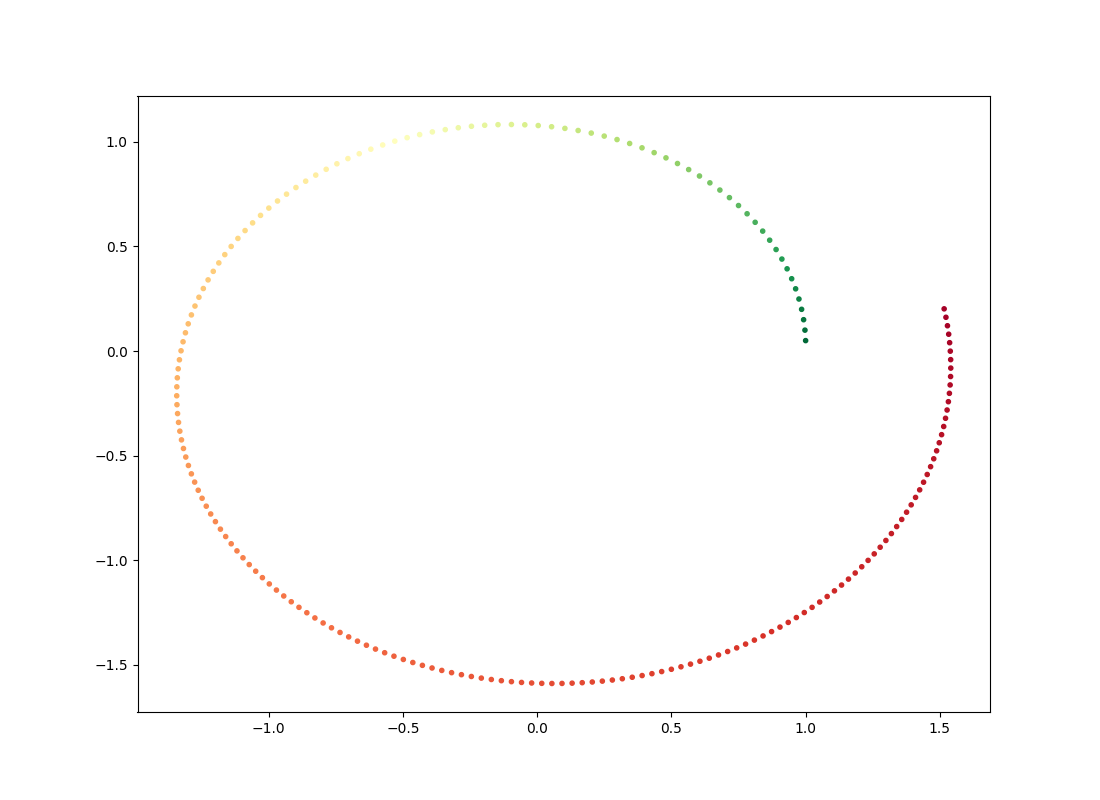

In [144]:
w = np.array([0, 1])
s = np.array([1, 0])
stepsize = .05
steps = 200

plt.figure(figsize=(11,8))
plt.title("Time Step Vectors")
plt.xlabel("X-Position")
plt.ylabel("Y-Position")
x_s, y_s, E, W = calculate(s, w, stepsize, steps)
rel_E_err = energy_error(E, energy(w,s))
delta_t = np.linspace(0.001, 1)
zero = np.zeros(len(x_s))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))
steps_array = np.linspace(0, steps, steps)
plt.figure(figsize=(11,8))
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")
plt.plot(steps_array, rel_E_err)

plt.figure(figsize=(11,8))
plt.scatter(x_s, y_s, c=E, cmap='RdYlGn_r', marker=".")

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


<IPython.core.display.Javascript object>


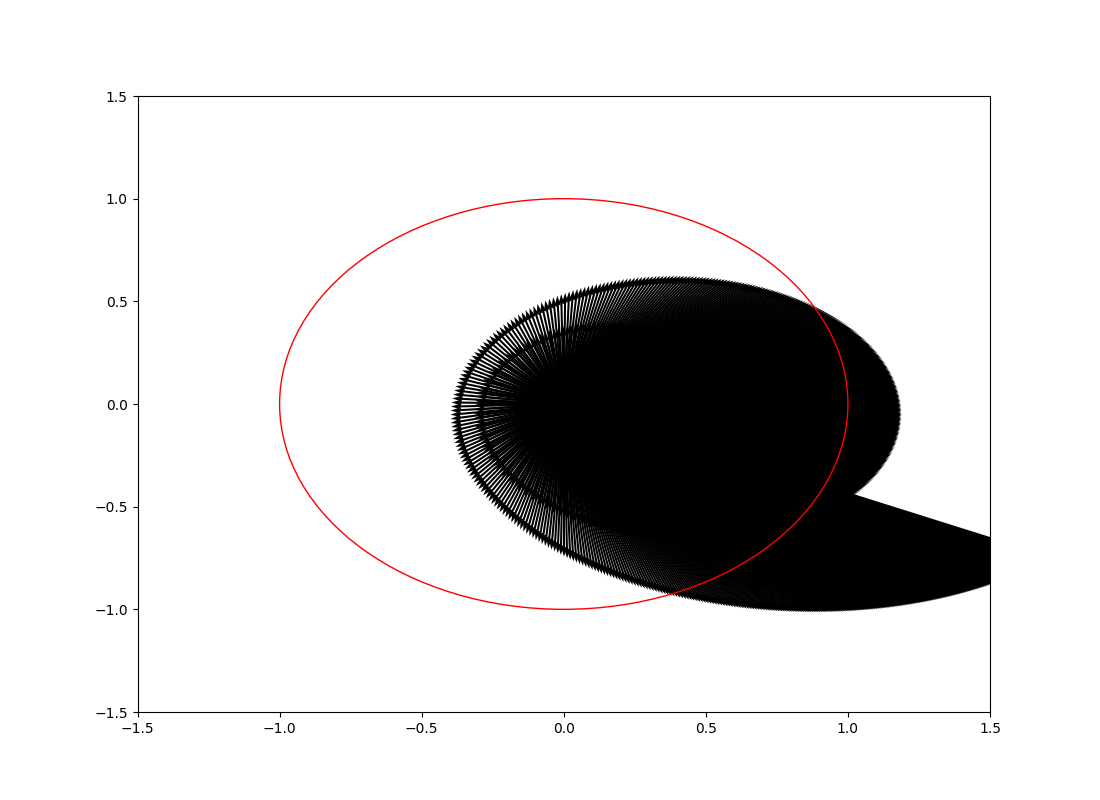

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


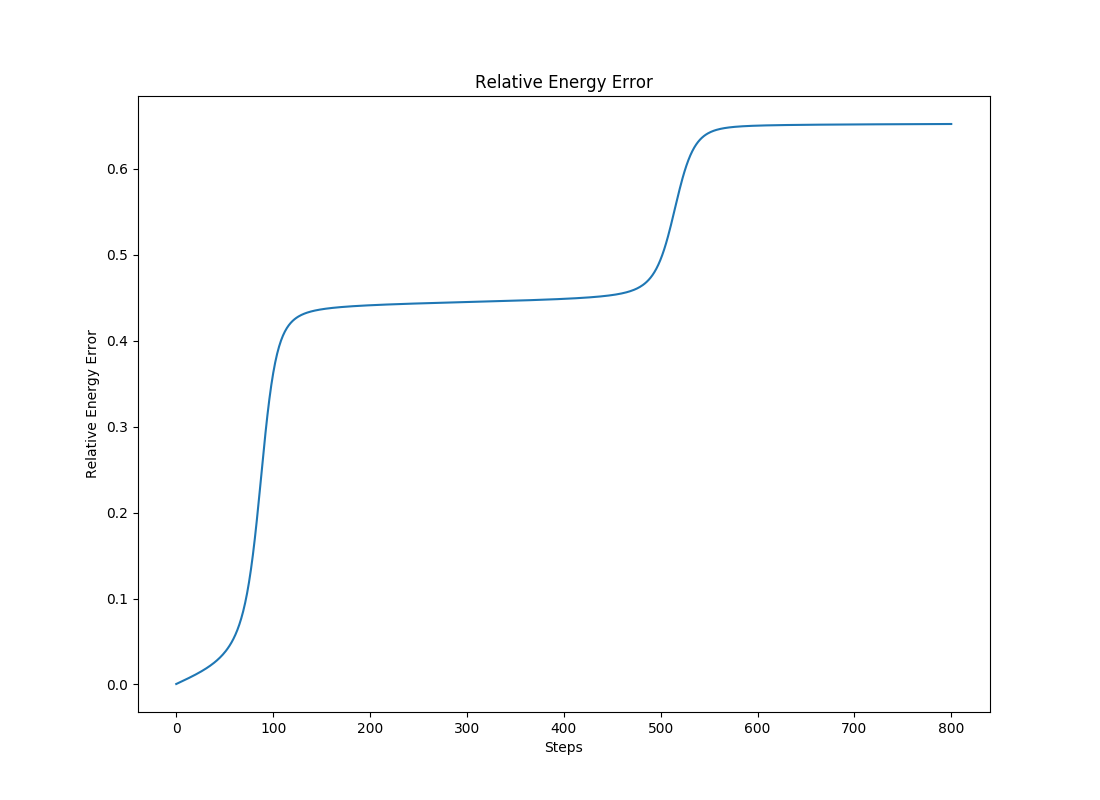

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


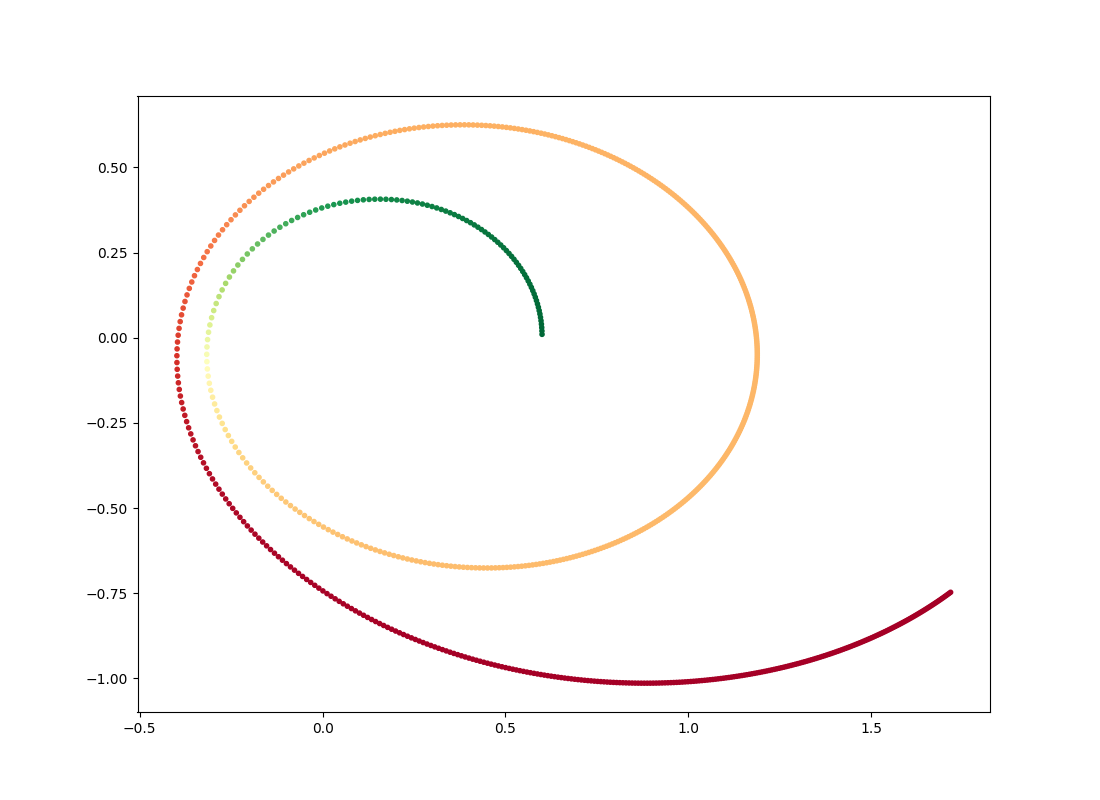

In [132]:
w = np.array([0, 1])
s = np.array([0.6, 0])
steps = 800
stepsize = 0.01


plt.figure(figsize=(11,8))

x_s, y_s, E, W = calculate(s, w, stepsize, steps)

rel_E_err = energy_error(E, energy(w,s))
zero = np.zeros(len(x_s))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))
#plt.show()
steps_array = np.linspace(0, steps, steps)
plt.figure(figsize=(11,8))
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")
plt.plot(steps_array, rel_E_err)
plt.figure(figsize=(11,8))

plt.scatter(x_s, y_s, c=E, cmap='RdYlGn_r', marker=".")

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


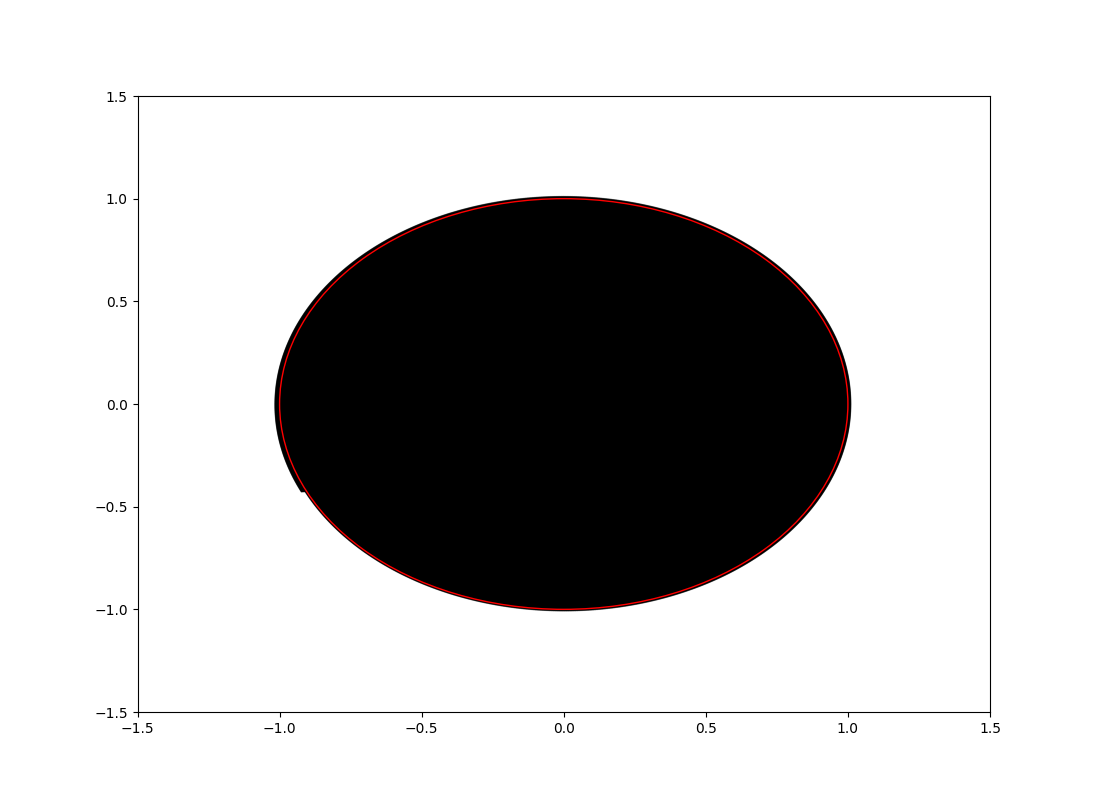

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


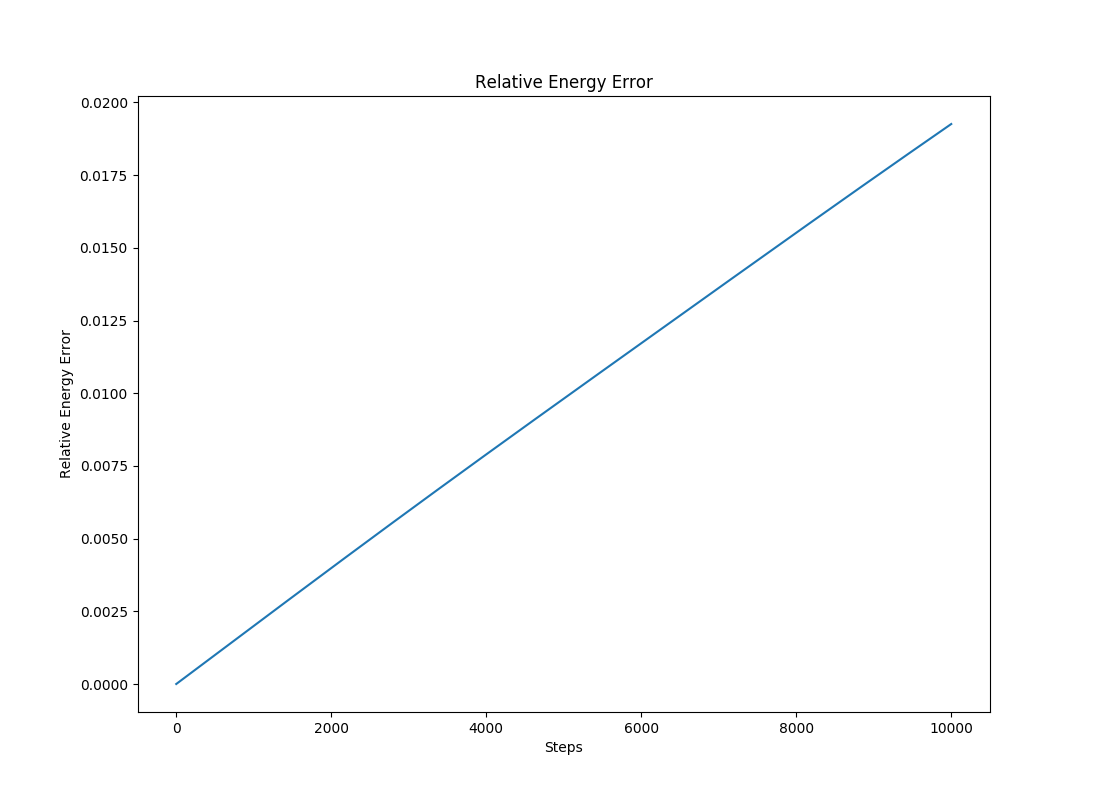

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


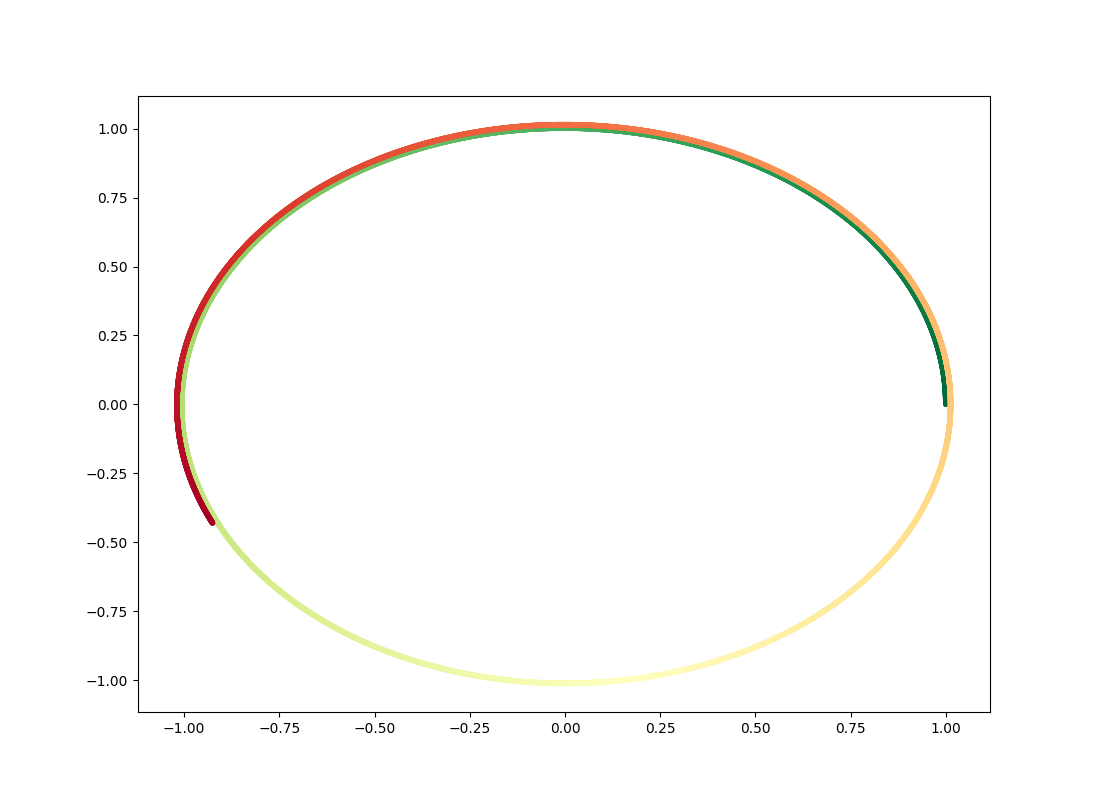

In [136]:
w = np.array([0, 1])
s = np.array([1, 0])
stepsize = 0.001
steps = 10000

plt.figure(figsize=(11,8))

x_s, y_s, E, W = calculate(s, w, stepsize, steps)

rel_E_err = energy_error(E, energy(w,s))
zero = np.zeros(len(x_s))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))
steps_array = np.linspace(0, steps, steps)
plt.figure(figsize=(11,8))
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")
plt.plot(steps_array, rel_E_err)

plt.figure(figsize=(11,8))

plt.scatter(x_s, y_s, c=E, cmap='RdYlGn_r', marker=".")

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


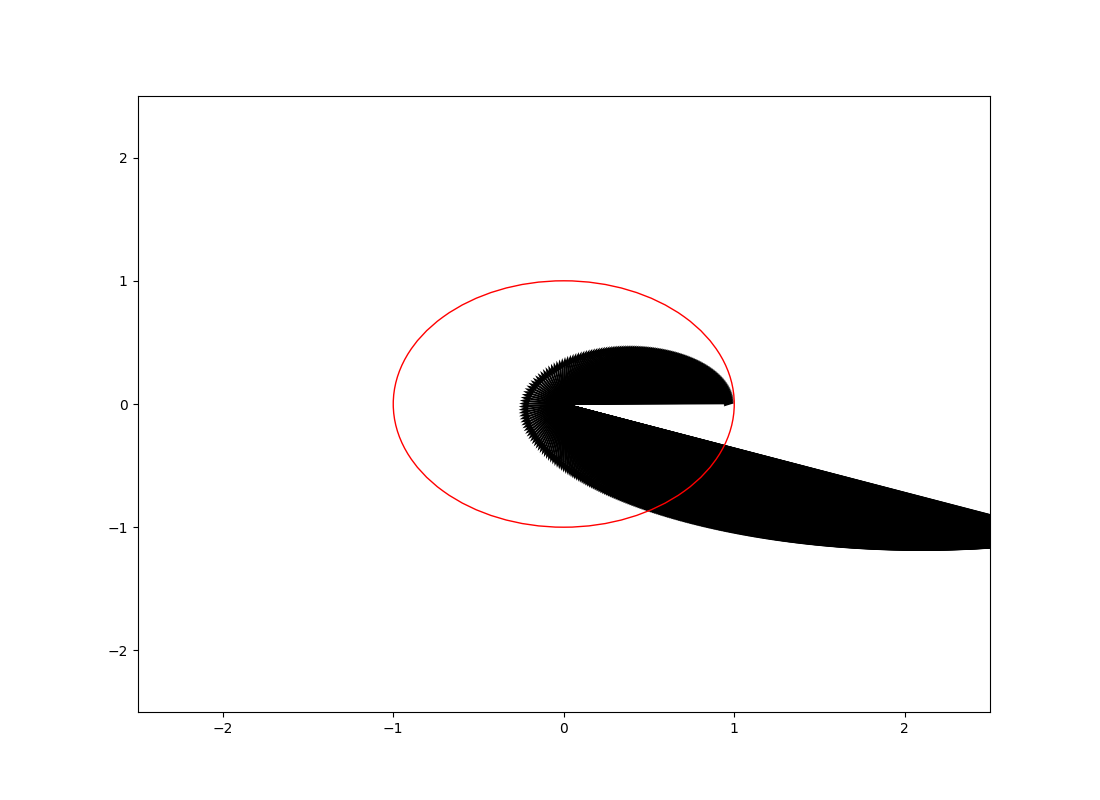

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


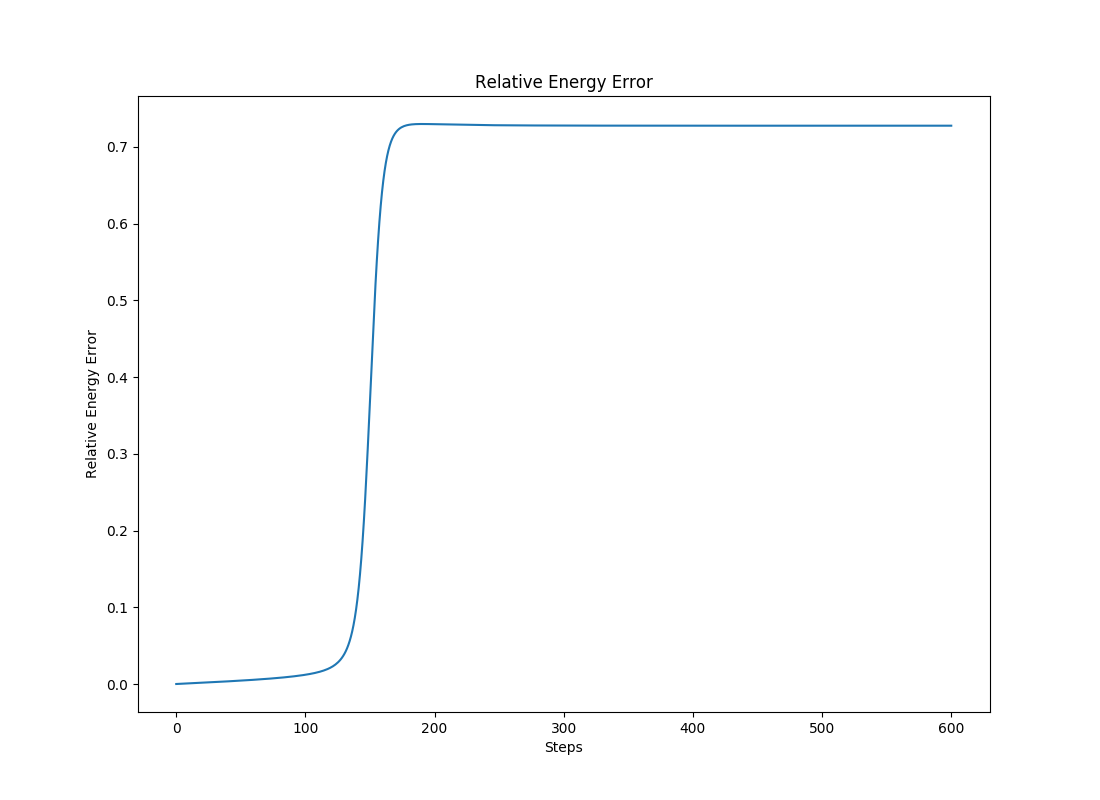

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


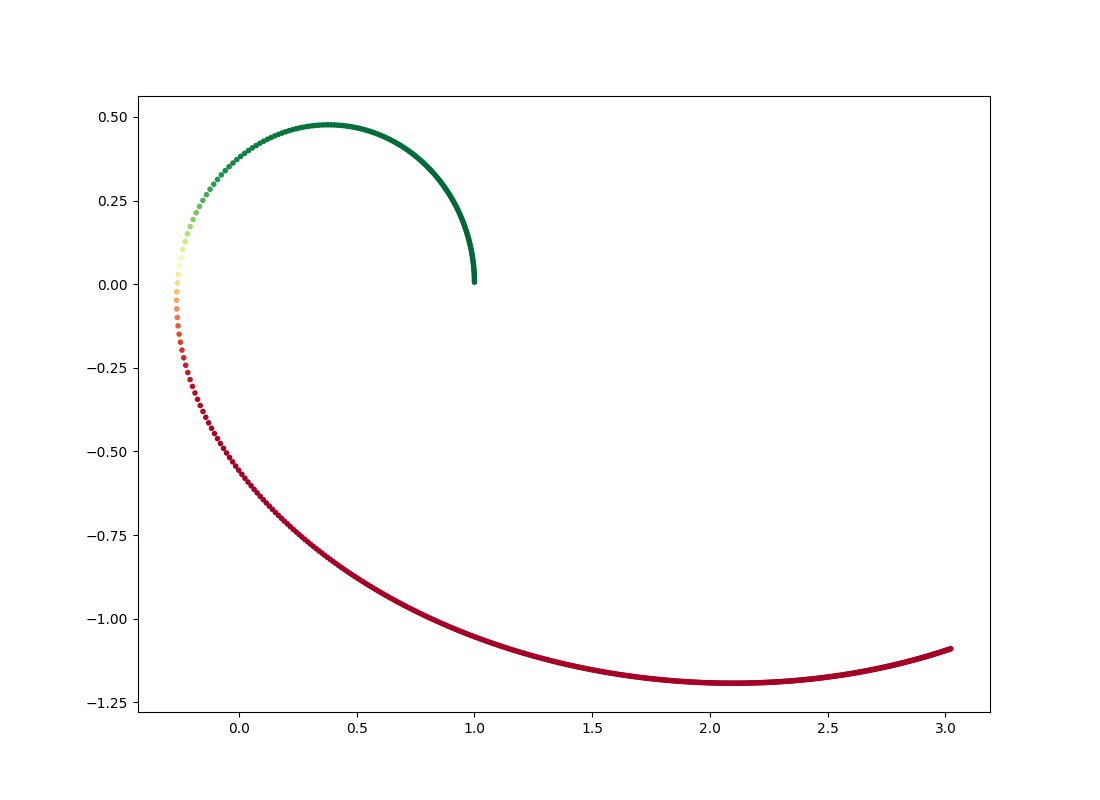

In [138]:
w = np.array([0, 0.6])
s = np.array([1, 0])
steps = 600
stepsize = 0.01

plt.figure(figsize=(11,8))

x_s, y_s, E, W = calculate(s, w, stepsize, steps)

rel_E_err = energy_error(E, energy(w,s))
zero = np.zeros(len(x_s))
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))

steps_array = np.linspace(0, steps, steps)
plt.figure(figsize=(11,8))
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")
plt.plot(steps_array, rel_E_err)


plt.figure(figsize=(11,8))
plt.scatter(x_s, y_s, c=E, cmap='RdYlGn_r', marker=".")

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


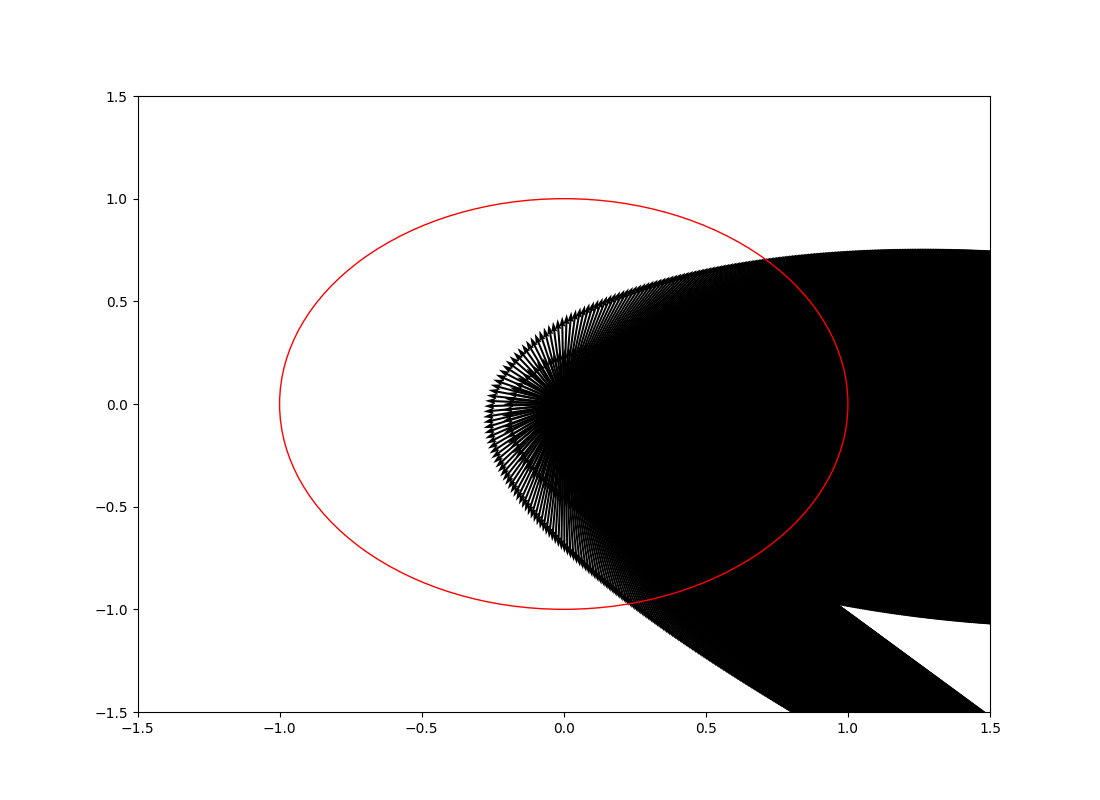

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


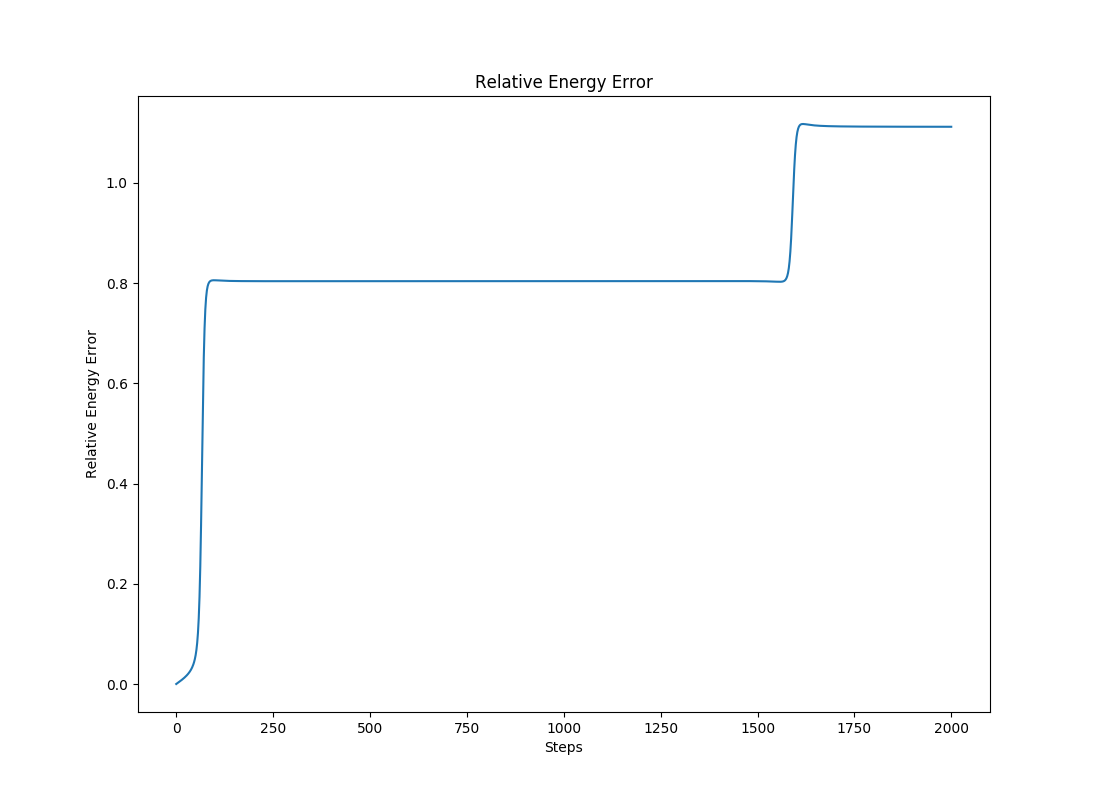

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


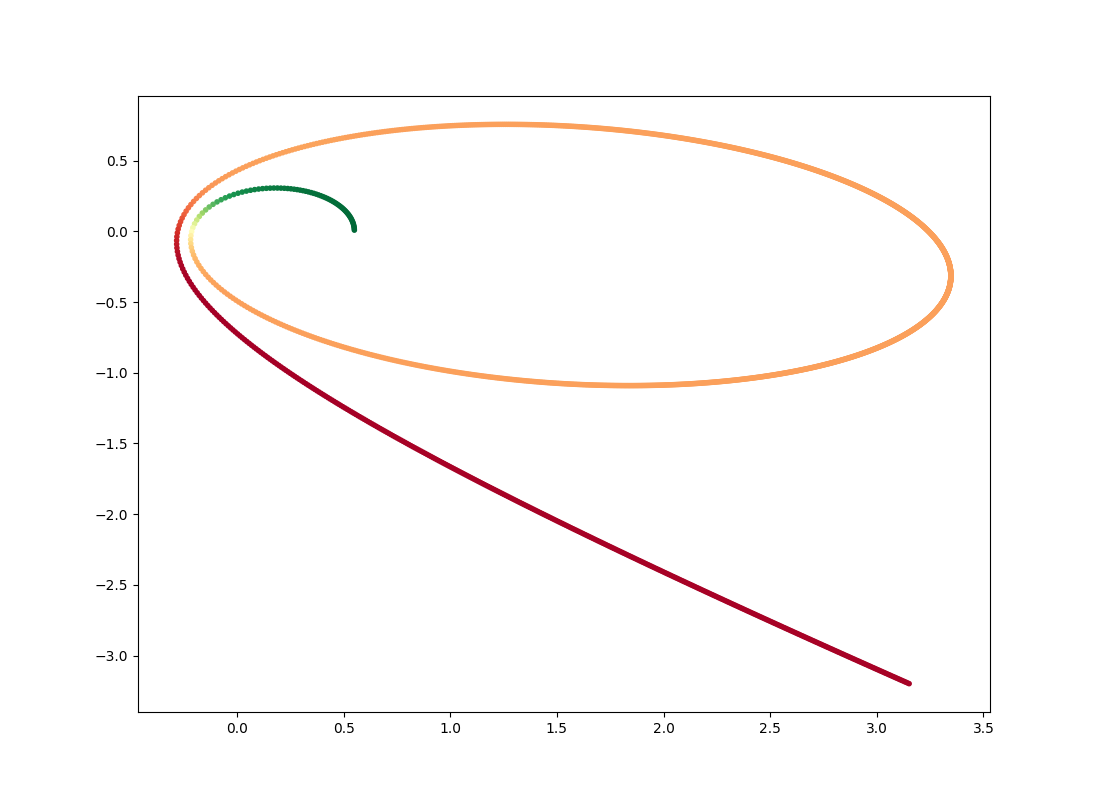

In [139]:
w = np.array([0, 0.9])
s = np.array([0.55, 0])
stepsize = 0.01
steps = 2000

plt.figure(figsize=(11,8))

x_s, y_s, E, W = calculate(s, w, stepsize, steps)

rel_E_err = energy_error(E, energy(w,s))
zero = np.zeros(len(x_s))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))

plt.figure(figsize=(11,8))
steps_array = np.linspace(0, steps, steps)
plt.plot(steps_array, rel_E_err)
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")

plt.figure(figsize=(11,8))

plt.scatter(x_s, y_s, c=E, cmap='RdYlGn_r', marker=".")


In [119]:
def calc_abs_energy_err(s, w, h):
    energy_error_time_step = []
    for t in h:
        _, _, E, _ = calculate(s, w, t, steps)
        E_err = np.abs((E[-1]-energy(w,s))/energy(w,s))
        energy_error_time_step.append(E_err)
    return energy_error_time_step

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


<IPython.core.display.Javascript object>


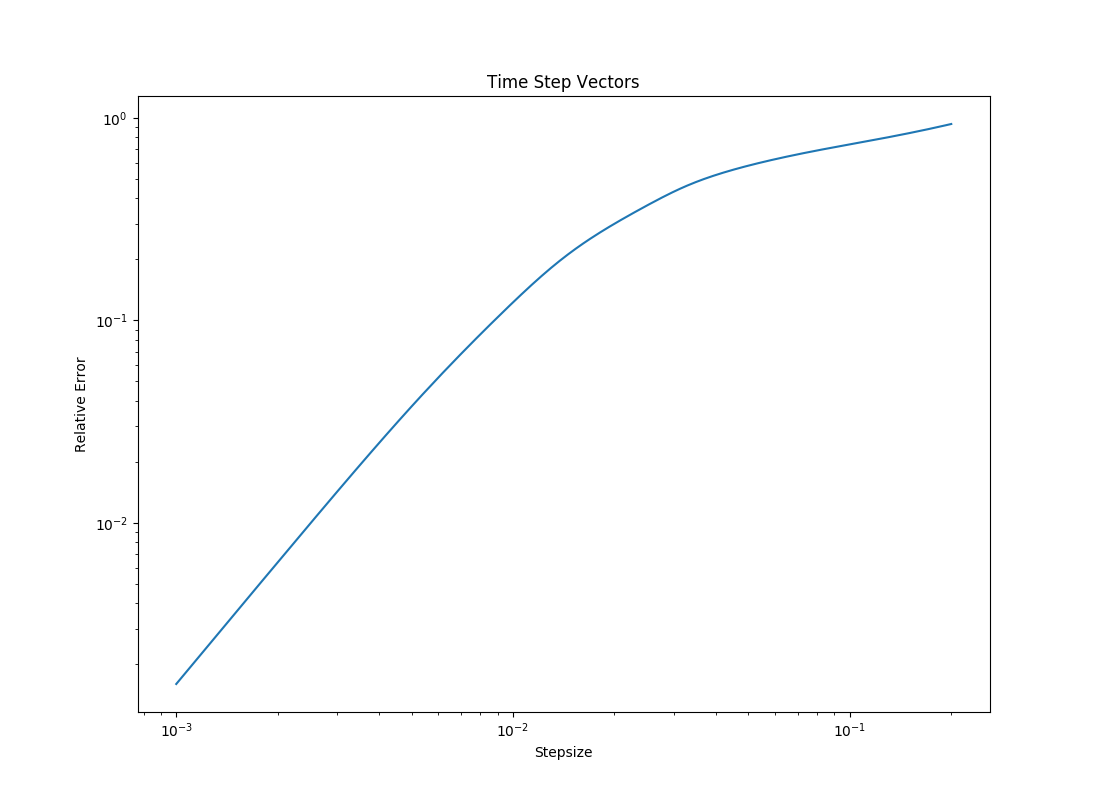

In [130]:
w = np.array([0, 1])
s = np.array([1, 0])
stepsize = 0.001
steps = 800
h = np.linspace(0.001, 0.2, 500)

plt.figure(figsize=(11,8))
plt.title("Time Step Vectors")
plt.xlabel("Stepsize")
plt.ylabel("Relative Error")
plt.yscale("log")
plt.xscale("log")
rel_E_err = calc_abs_energy_err(s, w, h)
plt.plot(h, rel_E_err)


In [131]:
def calculate_leap(s_0, w_0, h, steps):
    S = []
    W = []
    E = []
    for i in range(steps):
        if i == 0:
            w_i_12 = w_0 - (((s_0/norm(s_0)**3) * h*0.5))
        else:
            w_i_12 = w_0 - (((s_0/norm(s_0)**3) * h))
        s_i_1 = s_0 + w_i_12*h
        W.append(w_i_12)
        S.append(s_i_1)
        e = energy(w_i_12, s_i_1)
        E.append(e)
        s_0 = s_i_1
        w_0 = w_i_12
    x_s, y_s = turn_vectors_into_2_arrays(S)
    return x_s, y_s, E, W

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


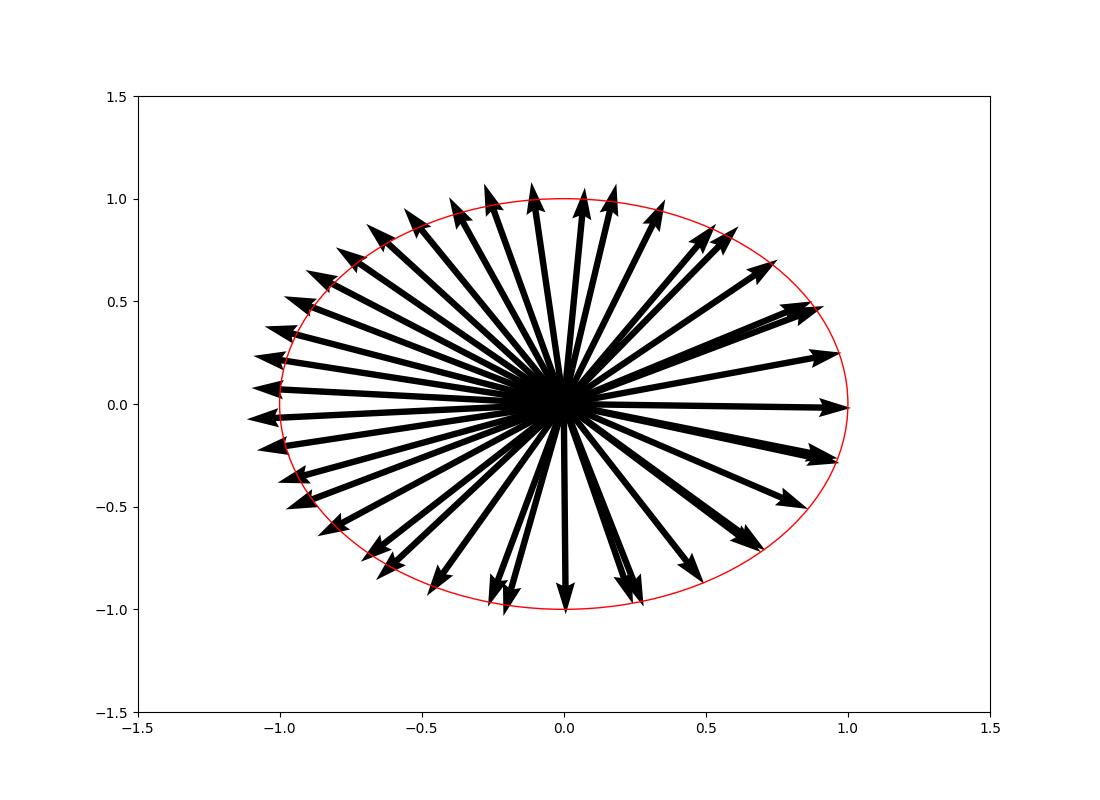

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


<IPython.core.display.Javascript object>


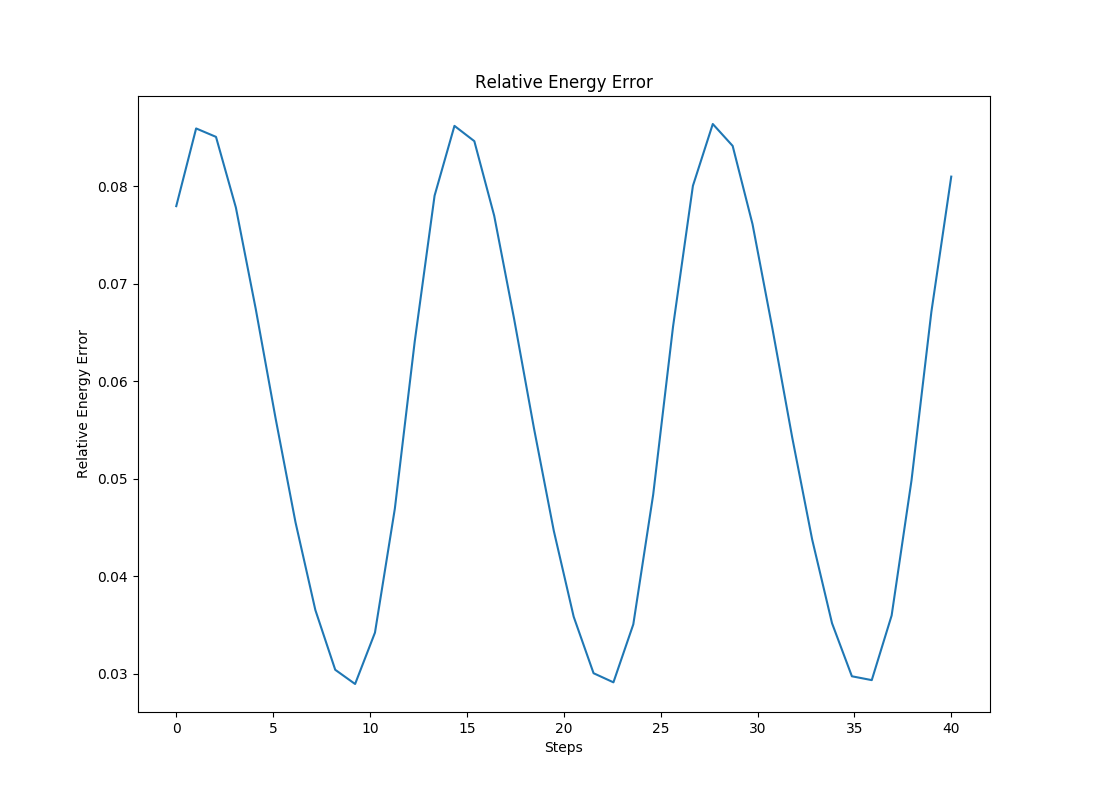

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


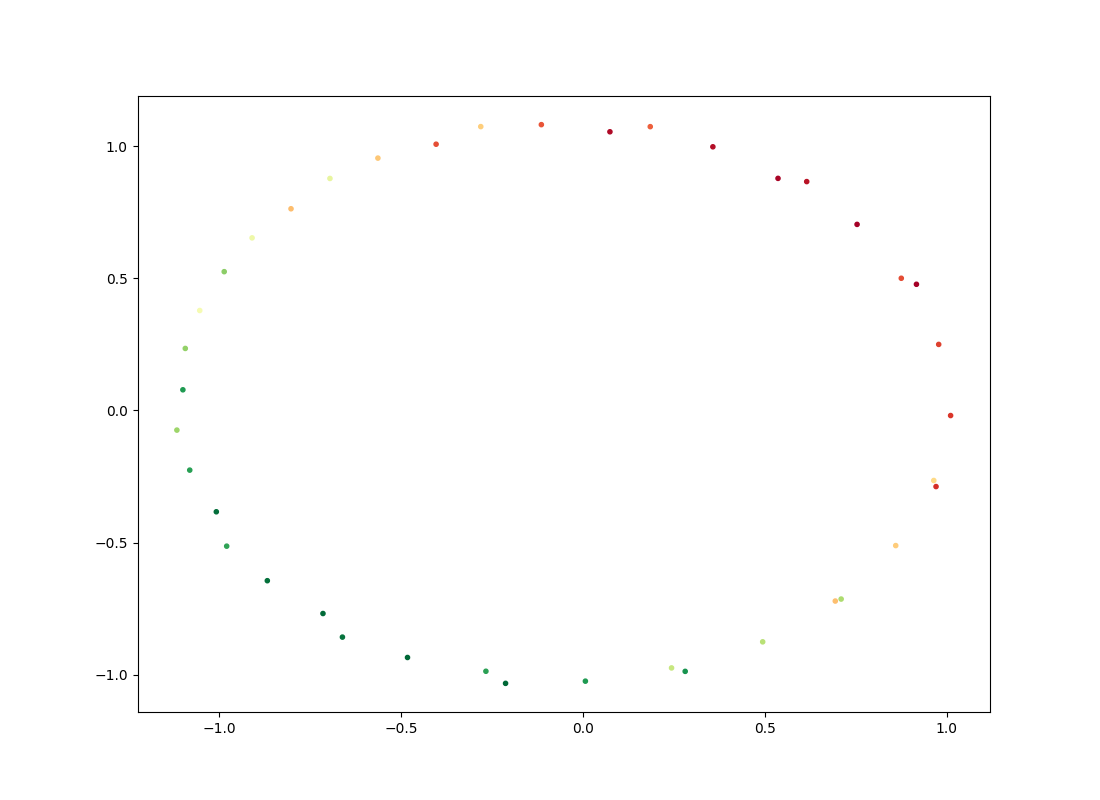

In [141]:

w = np.array([0, 1])
s = np.array([1, 0])
stepsize = 0.5
steps = 40

plt.figure(figsize=(11,8))

x_s, y_s, E, _ = calculate_leap(s, w, stepsize, steps)
rel_E_err = energy_error(E, energy(w,s))
zero = np.zeros(len(x_s))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))

plt.figure(figsize=(11,8))
steps_array = np.linspace(0, steps, steps)
plt.plot(steps_array, rel_E_err)
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")

plt.figure(figsize=(11,8))


plt.scatter(x_s, y_s, c=E, cmap='RdYlGn_r', marker=".")

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


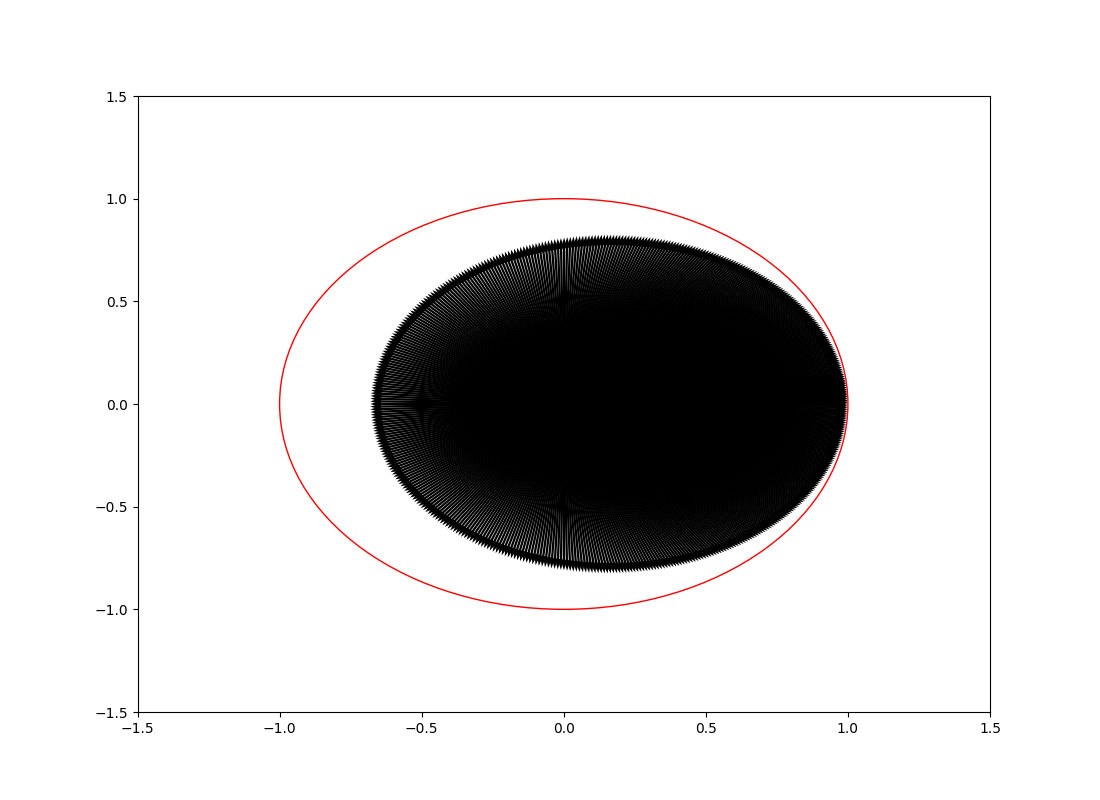

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


<IPython.core.display.Javascript object>


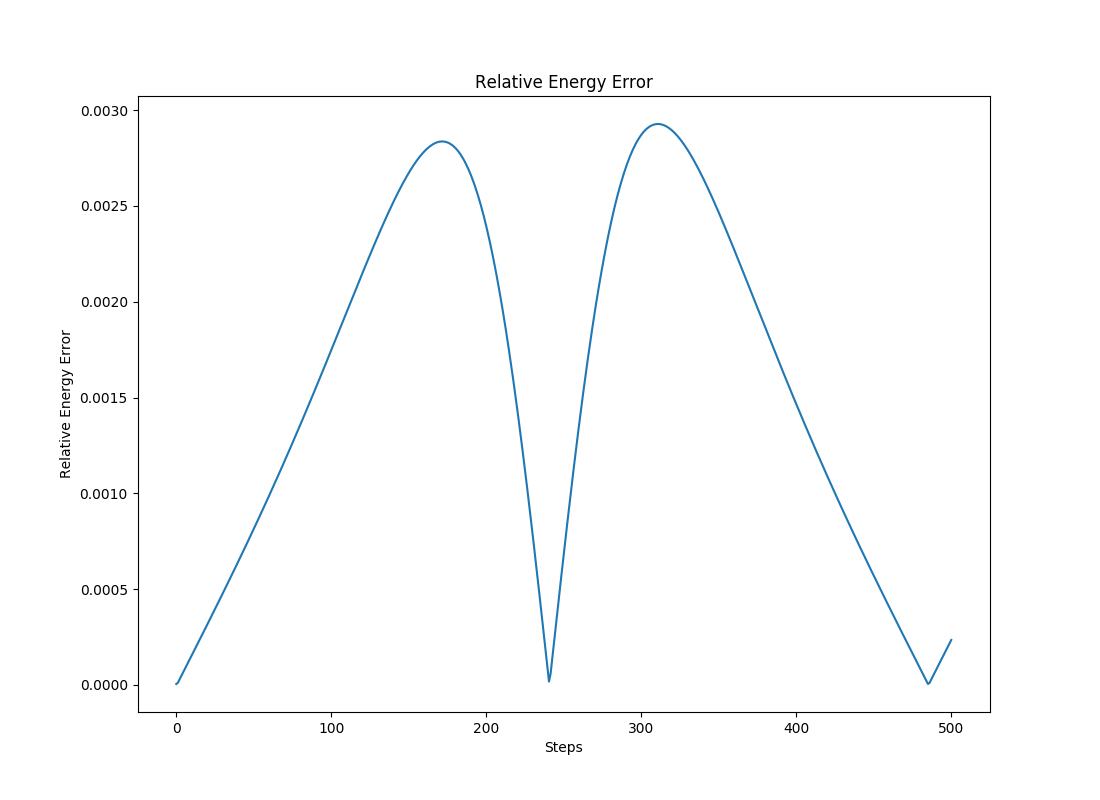

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


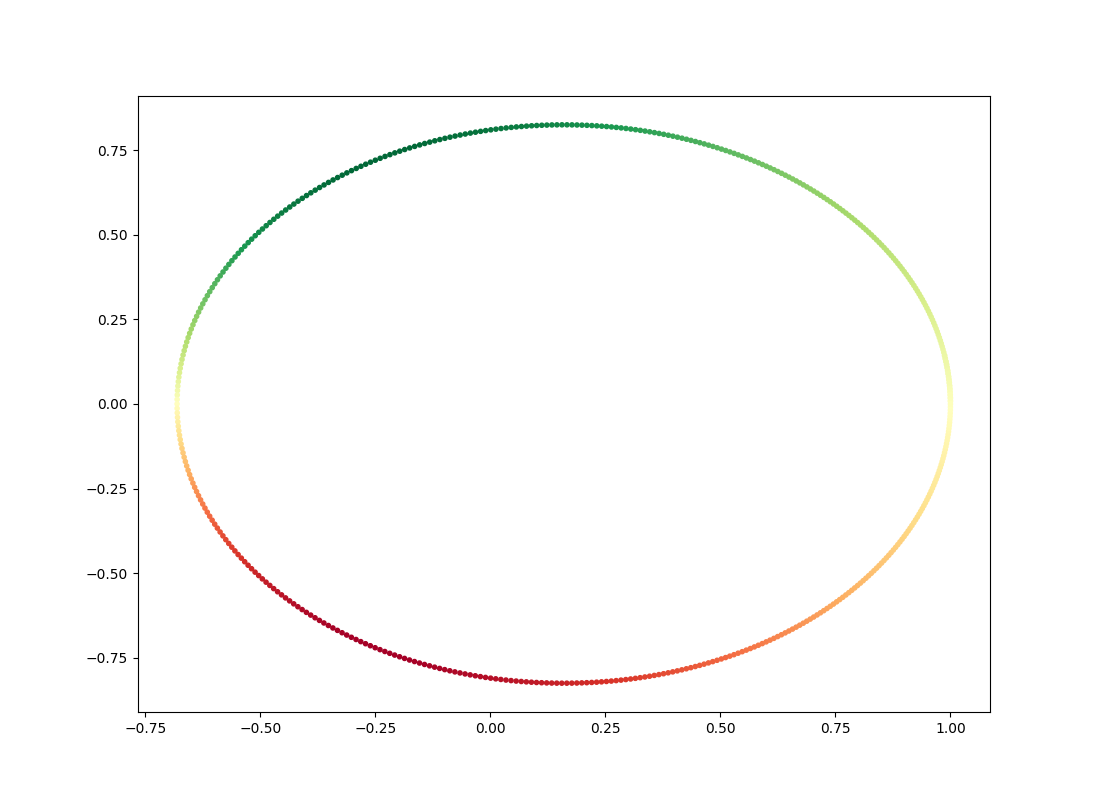

In [123]:
w = np.array([0, 0.9])
s = np.array([1, 0])
stepsize = 0.01
steps = 500

plt.figure(figsize=(11,8))

x_s, y_s, E, _ = calculate_leap(s, w, stepsize, steps)
rel_E_err = energy_error(E, energy(w,s))
zero = np.zeros(len(x_s))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))

plt.figure(figsize=(11,8))
steps_array = np.linspace(0, steps, steps)
plt.plot(steps_array, rel_E_err)
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")


plt.figure(figsize=(11,8))


plt.scatter(x_s, y_s, c=E, cmap='RdYlGn_r', marker=".")



In [124]:
def calc_abs_leap_energy_err(s, w, h):
    energy_error_time_step = []
    for t in h:
        _, _, E, _ = calculate_leap(s, w, t, steps)
        E_err = np.abs((E[-1]-energy(w,s))/energy(w,s))
        energy_error_time_step.append(E_err)
    return energy_error_time_step

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<IPython.core.display.Javascript object>


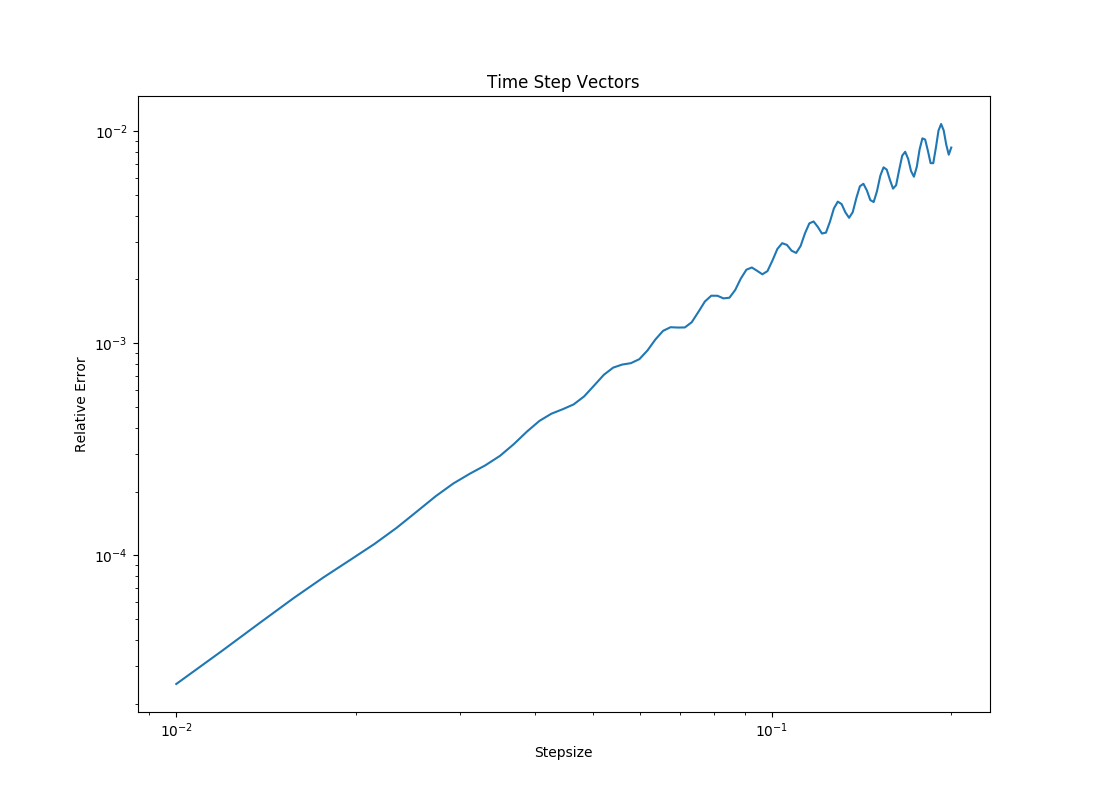

In [125]:
w = np.array([0, 1])
s = np.array([1, 0])
h = np.linspace(0.01, 0.2, 100)

plt.figure(figsize=(11,8))
plt.title("Time Step Vectors")
plt.xlabel("Stepsize")
plt.ylabel("Relative Error")
plt.yscale("log")
plt.xscale("log")
rel_E_err = calc_abs_leap_energy_err(s, w, h)
plt.plot(h, rel_E_err)

In [126]:
def energy(w, s):
    return norm(w)**2/2 - (1/norm(s))

def energy_error(Energies, E_0):
    rel_E = []
    for Energy in Energies:
        rel_E_i = np.abs((E_0 - Energy)/E_0)
        rel_E.append(np.abs(rel_E_i))
    return rel_E



def turn_vectors_into_3_arrays(List):
    x_list = []
    y_list = []
    z_list = []
    for i in List:
        x_list.append(i[0])
        y_list.append(i[1])
        z_list.append(i[2])
    return x_list, y_list, z_list

def calculate_3d(s_0, w_0, h, steps):
    S = []
    W = []
    E = []
    for i in range(steps):
        s_i = s_0 + (w_0*h)
        w_i = w_0 - ((s_0/norm(s_0)**3) * h)
        W.append(w_i)
        S.append(s_i)
        e = energy(w_i, s_i)
        E.append(e)
        s_0 = s_i
        w_0 = w_i
    x_s, y_s, z_s = turn_vectors_into_3_arrays(S)
    return x_s, y_s, z_s, E, W

def calculate_leap_3d(s_0, w_0, h, steps):
    S = []
    W = []
    E = []
    for i in range(steps):
        if i == 0:
            w_i_12 = w_0 - (((s_0/norm(s_0)**3) * h*0.5))
        else:
            w_i_12 = w_0 - (((s_0/norm(s_0)**3) * h))
        s_i_1 = s_0 + w_i_12*h
        W.append(w_i_12)
        S.append(s_i_1)
        e = energy(w_i_12, s_i_1)
        E.append(e)
        s_0 = s_i_1
        w_0 = w_i_12
    x_s, y_s, z_s = turn_vectors_into_3_arrays(S)
    return x_s, y_s, z_s, E, W


/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


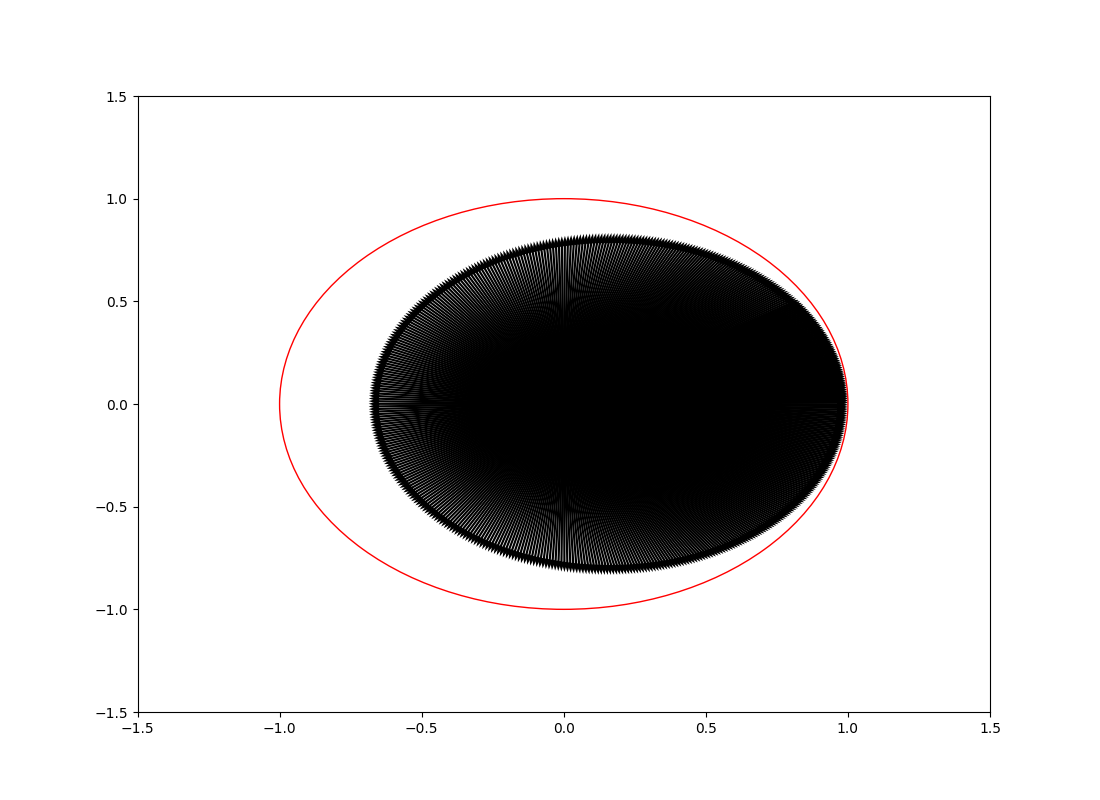

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


<IPython.core.display.Javascript object>


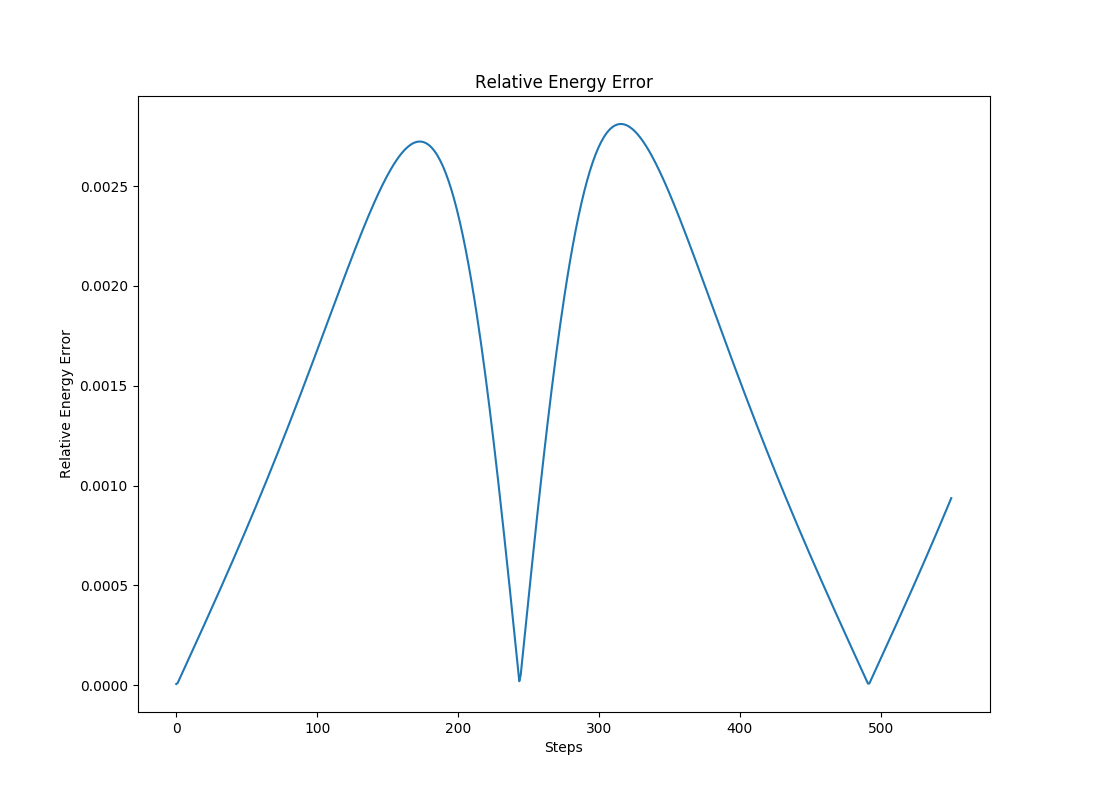

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


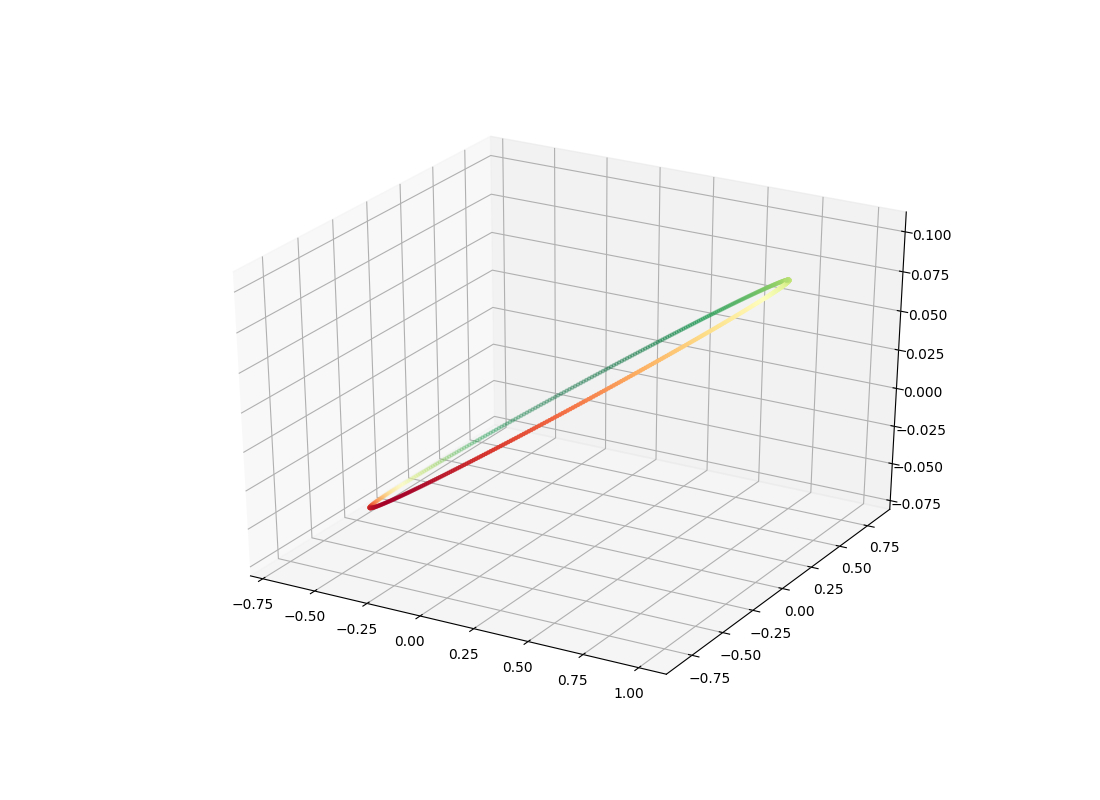

In [127]:
w = np.array([0, 0.9, 0])
s = np.array([1, 0, 0.1])
stepsize = 0.01
steps = 550

plt.figure(figsize=(11,8))

x_s, y_s, z_s, E, _ = calculate_leap_3d(s, w, stepsize, steps)
rel_E_err = energy_error(E, energy(w,s))
zero = np.zeros(len(x_s))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))

plt.figure(figsize=(11,8))
steps_array = np.linspace(0, steps, steps)
plt.plot(steps_array, rel_E_err)
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_s, y_s, z_s, c=E, cmap='RdYlGn_r', marker=".")

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


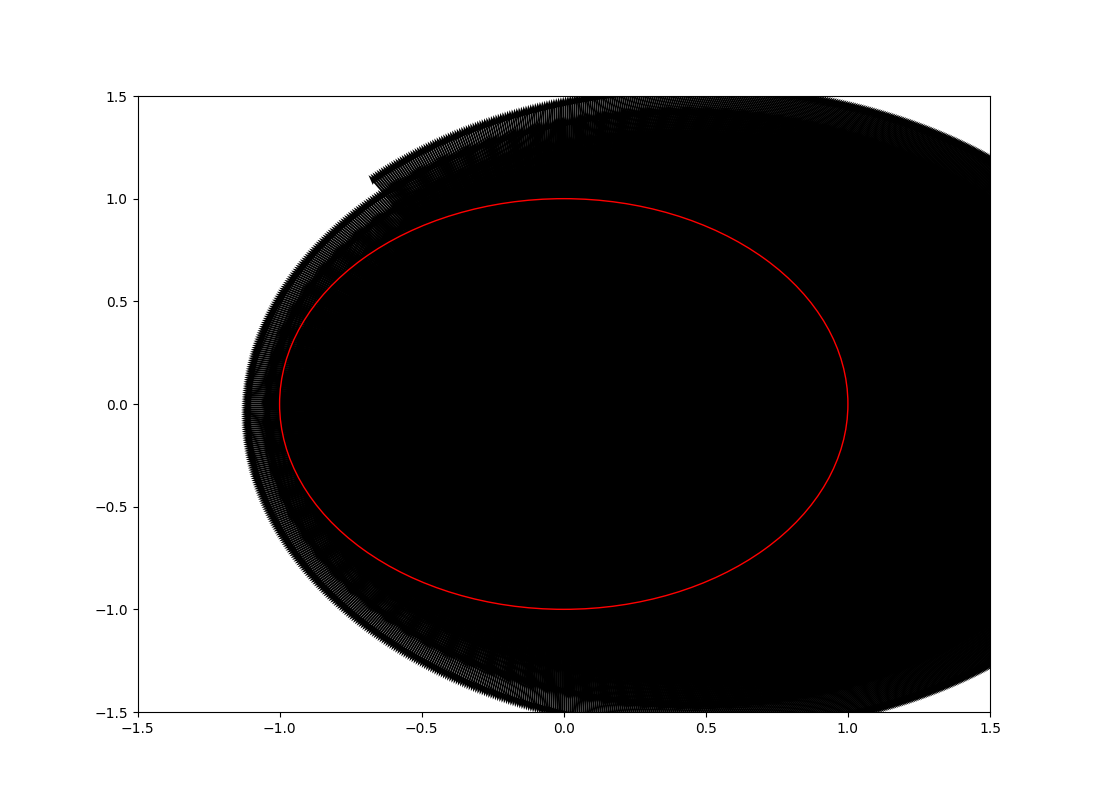

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


<IPython.core.display.Javascript object>


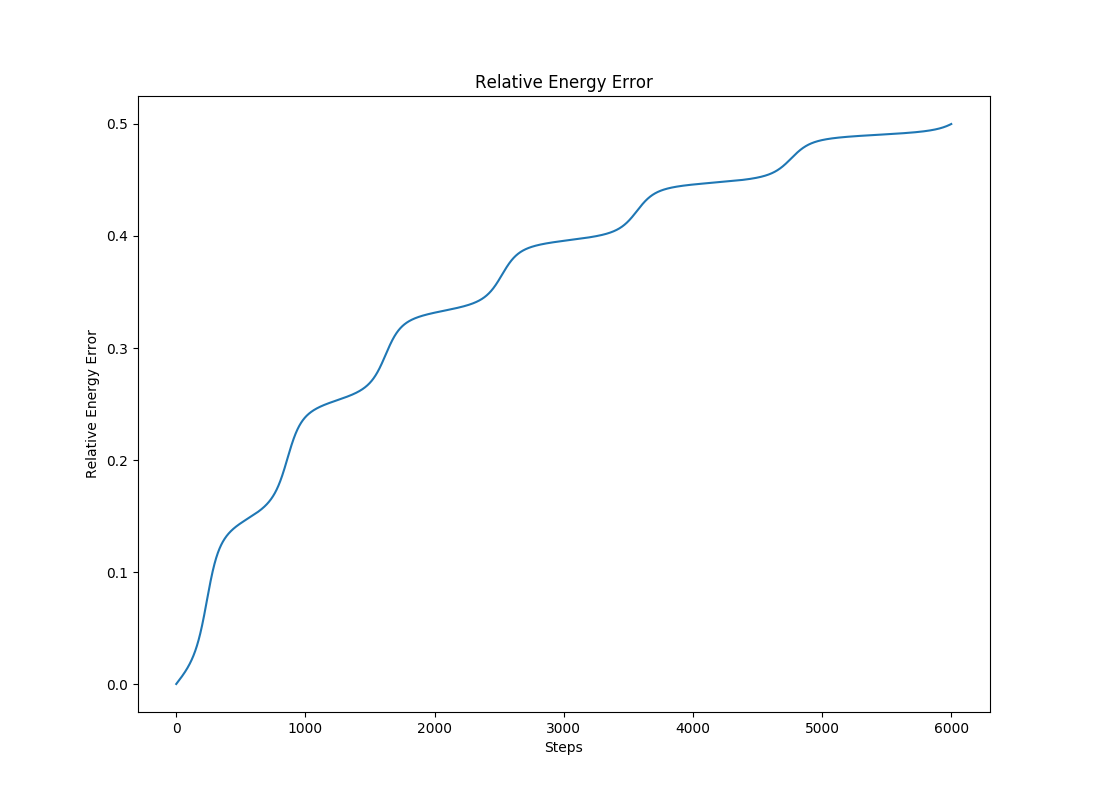

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


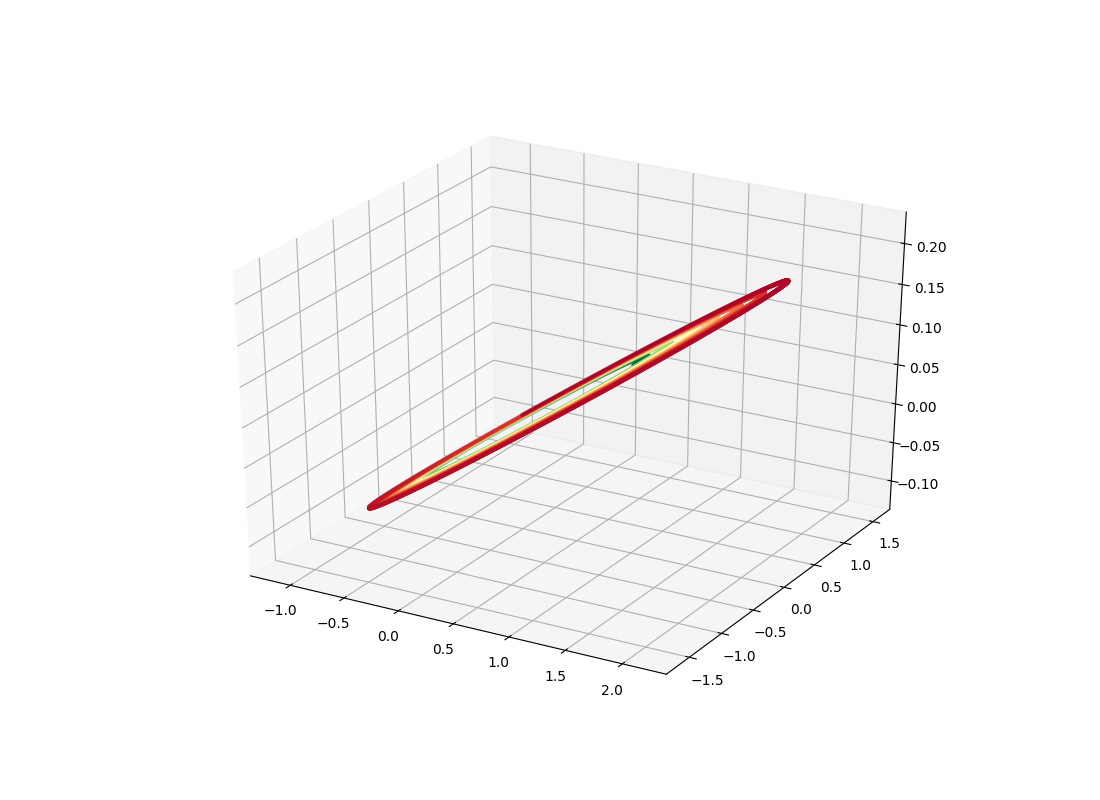

In [128]:
w = np.array([0, 0.9, 0])
s = np.array([1, 0, 0.1])
stepsize = 0.01
steps = 6000

plt.figure(figsize=(11,8))

x_s, y_s, z_s, E, _ = calculate_3d(s, w, stepsize, steps)
rel_E_err = energy_error(E, energy(w,s))
zero = np.zeros(len(x_s))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))

plt.figure(figsize=(11,8))
steps_array = np.linspace(0, steps, steps)
plt.plot(steps_array, rel_E_err)
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_s, y_s, z_s, c=E, cmap='RdYlGn_r', marker=".")


/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


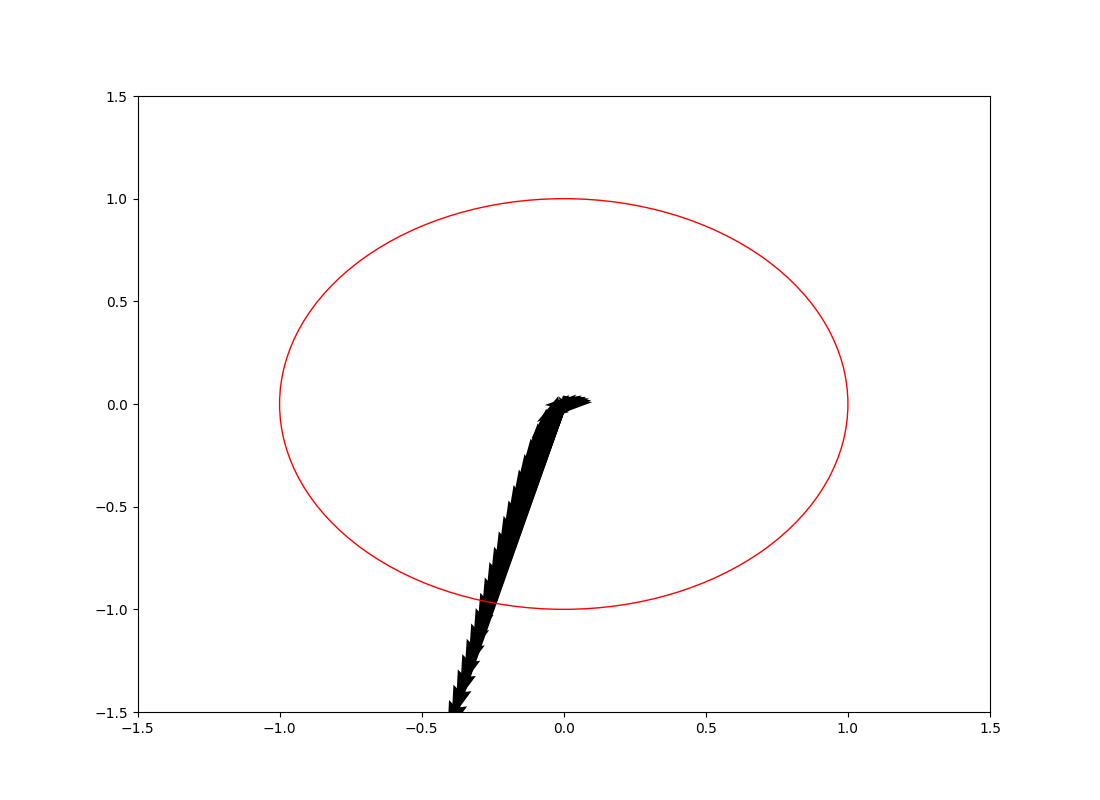

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


<IPython.core.display.Javascript object>


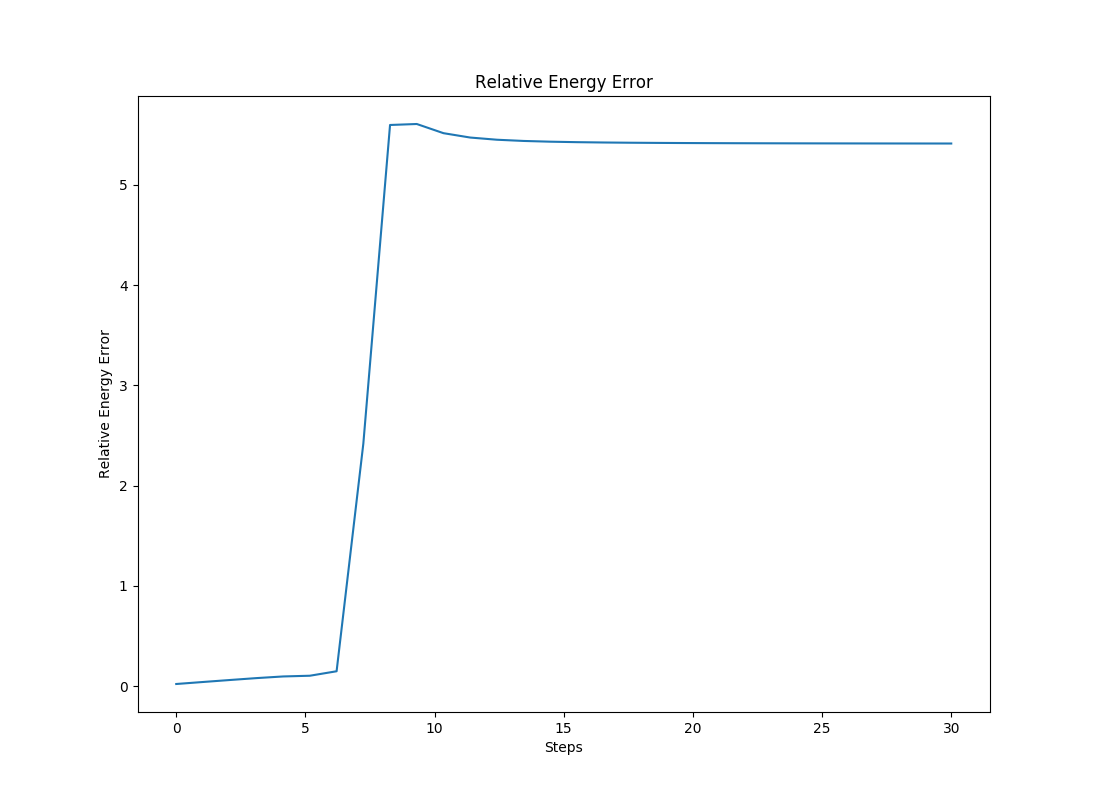

/Users/noahwach/PycharmProjects/Numpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


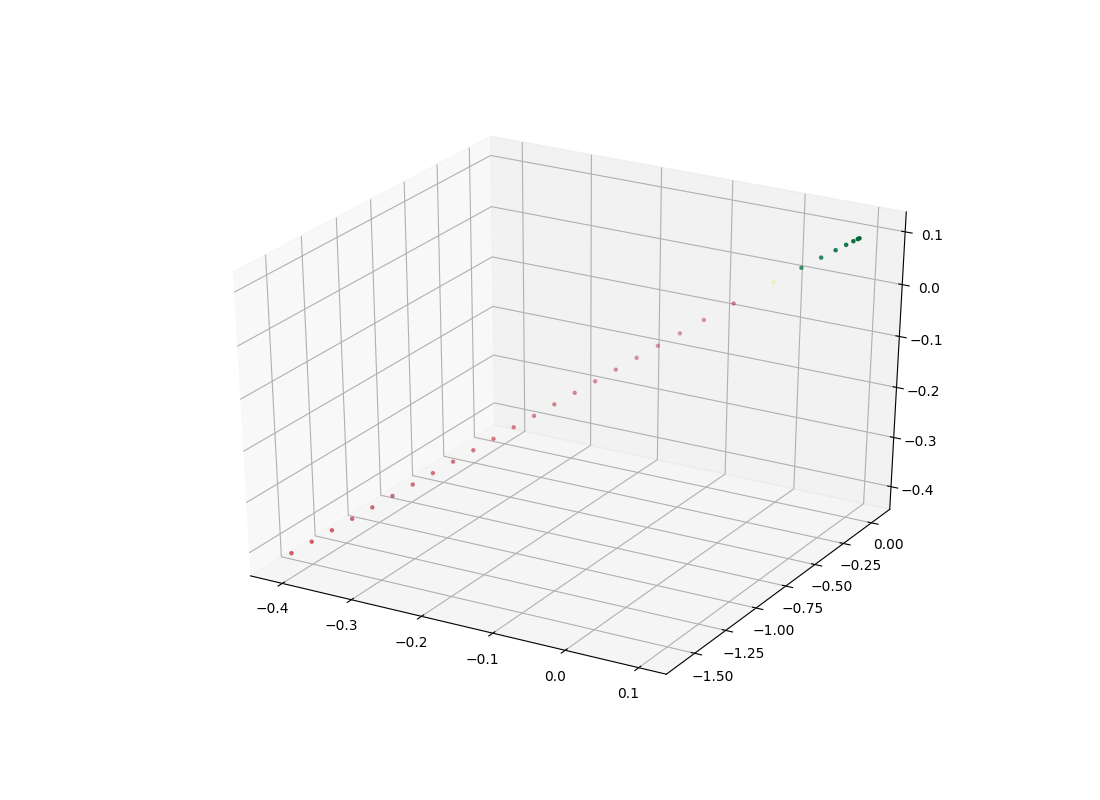

In [129]:
w = np.array([0, 0.9, 0])
s = np.array([0.1, 0, 0.1])
stepsize = 0.01
steps = 30

plt.figure(figsize=(11,8))

x_s, y_s, z_s, E, _ = calculate_3d(s, w, stepsize, steps)
rel_E_err = energy_error(E, energy(w,s))
zero = np.zeros(len(x_s))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.quiver(zero, zero, x_s, y_s, scale=1, angles="xy", scale_units="xy")
plt.gca().add_artist(plt.Circle((0, 0), 1, fill=False, color="r"))

plt.figure(figsize=(11,8))
steps_array = np.linspace(0, steps, steps)
plt.plot(steps_array, rel_E_err)
plt.title("Relative Energy Error")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_s, y_s, z_s, c=E, cmap='RdYlGn_r', marker=".")